# importing libraries

In [8]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

#for prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# loading the image

In [24]:
def load(path):
    img= cv2.imread(path)
    img1= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    '''plt.figure(figsize=(10,10)) #setting figure size
    plt.imshow(img1)
    plt.show()'''
    plt.figure(figsize=(10,10)) 
    plt.axis('off')
    plt.imshow(img1)
    plt.show()

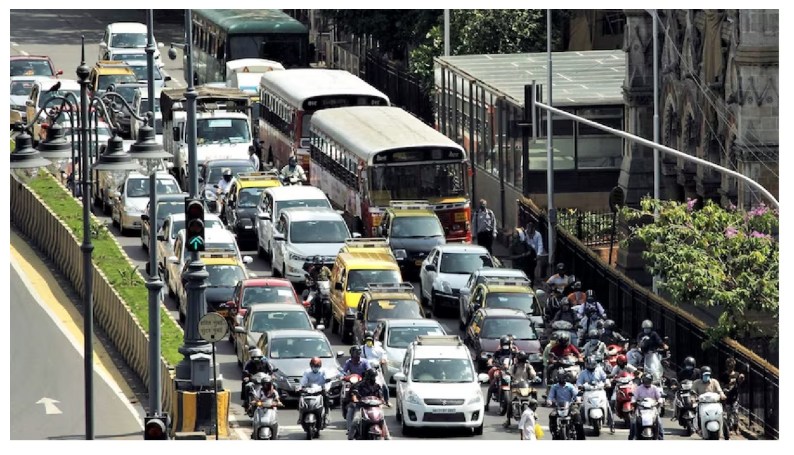

In [25]:
load("WhatsApp Image 2023-10-14 at 10.15.43 AM 2.jpeg")

# adding boxes in image

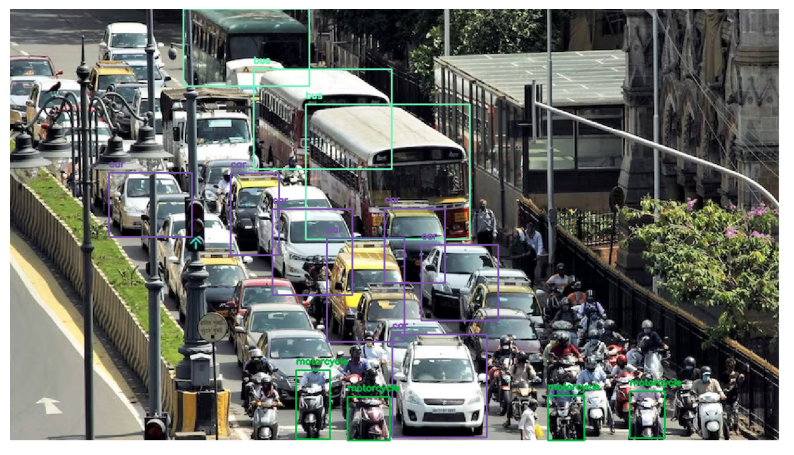

In [10]:
box, label, count= cv.detect_common_objects(img)
output= draw_bbox(img, box, label, count)
output= cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10)) #setting figure size
plt.axis('off')
plt.imshow(output)
plt.show()

# second photo

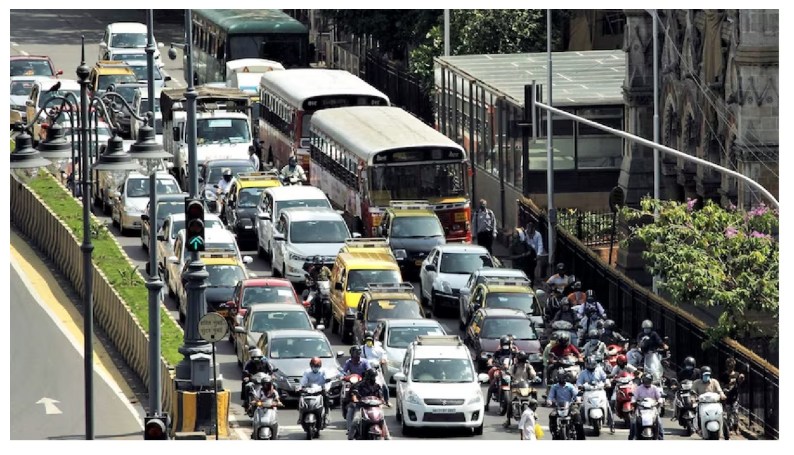

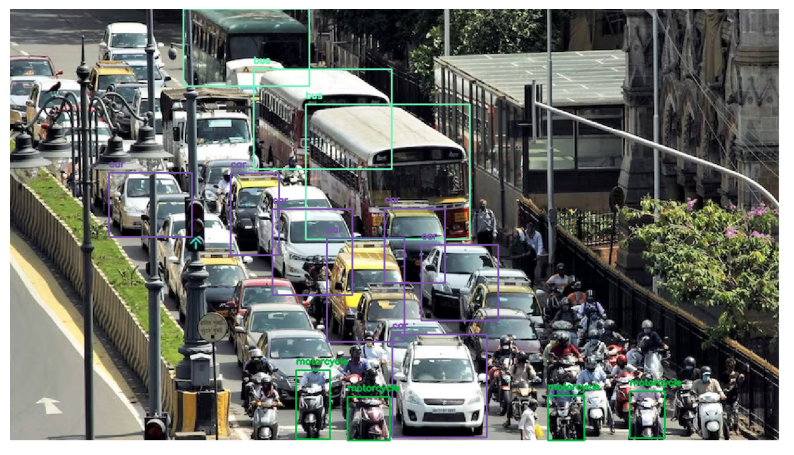

In [48]:
def pred(path):
    weight = {'bus':3, 'truck':3 , 'motorcycle':1 , 'car':2}
    weight_label = ['bus','truck','motorcycle','car']
    
    img = cv2.imread(path)
    boxes, labels, _ = cv.detect_common_objects(img)
    label_counts = {}
    label_weights = {}
    for label in labels:
        if label not in weight_label:
            continue
        elif label not in label_counts:
            label_counts[label] = 1
            label_weights[label] = 1*weight[label]
        else:
            label_counts[label] += 1
            label_weights[label] += 1*weight[label]
    
    for label, count in label_counts.items():
        print(f'{label}: {count}')
    print('total no of vehicles:',sum(label_counts.values()))
    print(label_weights)




In [49]:
pred("WhatsApp Image 2023-10-14 at 10.15.43 AM 2.jpeg")

bus: 3
car: 7
motorcycle: 4
total no of vehicles: 14
{'bus': 9, 'car': 14, 'motorcycle': 4}


# prediction

In [15]:
import pandas as pd
from tabulate import tabulate
data = []
for i in range(1, 51):
    num_vehicles = i * 2
    if num_vehicles>20:
         light_duration =40  + (2*num_vehicles)
    else:
         light_duration =40  + num_vehicles
    data.append([num_vehicles, light_duration])
df = pd.DataFrame(data, columns=["no_of_vehicles", "seconds"])
print(df)

    no_of_vehicles  seconds
0                2       42
1                4       44
2                6       46
3                8       48
4               10       50
5               12       52
6               14       54
7               16       56
8               18       58
9               20       60
10              22       84
11              24       88
12              26       92
13              28       96
14              30      100
15              32      104
16              34      108
17              36      112
18              38      116
19              40      120
20              42      124
21              44      128
22              46      132
23              48      136
24              50      140
25              52      144
26              54      148
27              56      152
28              58      156
29              60      160
30              62      164
31              64      168
32              66      172
33              68      176
34              70  

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x= df[['no_of_vehicles']]
y= df[['seconds']]

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=10)

In [19]:
reg= linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
reg.predict([[total]])

/Users/priyanshijain/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[65.2964497]])